In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('omw-1.4')
import string
import re
import demoji



df = pd.read_csv("C:/ML/python/data/amazon_reviews.csv",delimiter=',')

df.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,414d59b0-dbdd-43fe-b655-1f85bf8fd329,Adrian-Victor,Doesn't do anything more than the website.,1,0,NaN,2024-06-18 21:20:30,NaN
1,ed502bcb-0881-4db6-a02d-8250b69eefba,Nukeman25Gaming,They should make it so with teens that have Am...,5,0,28.12.0.100,2024-06-18 21:12:11,28.12.0.100
2,881eca25-3727-44c7-8939-d101d7d27a1d,phillip “The Mule”,"Could not find ""Log Out"" dumped the app",1,0,24.18.2.100,2024-06-18 21:05:11,24.18.2.100
3,6640b687-a5d0-4ef3-a1c9-d07d89ca6007,Taylor Nowitzke,They lie about shipping times and give no info...,1,0,28.12.0.100,2024-06-18 20:33:28,28.12.0.100
4,cfa3d0fb-8544-44bf-8c31-ad89cf3693d8,Zaylen Nordick,"Not only is the UI garbage, it can tale your m...",1,0,28.12.0.100,2024-06-18 20:31:42,28.12.0.100
5,b2136973-1df4-4ffe-8195-c1fb4ea60399,Lorna Slaughter,Excellent,5,0,28.11.2.100,2024-06-18 20:18:43,28.11.2.100
6,7c742cdb-021a-45e4-b2a6-6f3a0d98b677,Chit Chat Lobby,jeff bezozs can pay me million euros to change...,1,0,28.12.0.100,2024-06-18 20:09:50,28.12.0.100
7,67e76f86-ebe3-49ac-801f-00124bd3d7a4,Patricia Jones,Great 👍 app,5,0,28.10.0.100,2024-06-18 19:52:53,28.10.0.100
8,6ed10d03-c16b-4822-a7f9-9abe45614c77,ezridr1234,BEWARE!! AMAZON HAS BEEN ALLOWING THEFT OF MY ...,1,1,28.11.2.100,2024-06-18 19:42:57,28.11.2.100
9,c199fdf5-9fa0-4bd7-aac5-2cc4441d2d11,Cory Johnson,"They've implemented an ""AI"" chat feature and l...",2,3,28.12.0.100,2024-06-18 19:27:35,28.12.0.100


In [2]:
df['content'].head(10)

0           Doesn't do anything more than the website.
1    They should make it so with teens that have Am...
2              Could not find "Log Out" dumped the app
3    They lie about shipping times and give no info...
4    Not only is the UI garbage, it can tale your m...
5                                            Excellent
6    jeff bezozs can pay me million euros to change...
7                                          Great 👍 app
8    BEWARE!! AMAZON HAS BEEN ALLOWING THEFT OF MY ...
9    They've implemented an "AI" chat feature and l...
Name: content, dtype: object

In [3]:
def clean_text(text):
    
    text = str(text).lower()

    text = re.sub(r'<.*?>', '',text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = demoji.replace(text,'')
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text


df['content'] = df['content'].apply(clean_text)

df['content'].head(10)


0             doesnt do anything more than the website
1    they should make it so with teens that have am...
2                could not find log out dumped the app
3    they lie about shipping times and give no info...
4    not only is the ui garbage it can tale your mo...
5                                            excellent
6    jeff bezozs can pay me million euros to change...
7                                           great  app
8    beware amazon has been allowing theft of my ac...
9    theyve implemented an ai chat feature and like...
Name: content, dtype: object

In [4]:
sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)


df['content'] = df['content'].apply(remove_stopwords)

df['content'].head(10)


0                              doesnt anything website
1    make teens amazon parents amazon prime members...
2                            could find log dumped app
3    lie shipping times give information really exp...
4    ui garbage tale money seconds request refund p...
5                                            excellent
6    jeff bezozs pay million euros change 5 stars t...
7                                            great app
8    beware amazon allowing theft account two month...
9    theyve implemented ai chat feature like many t...
Name: content, dtype: object

In [5]:
lemma = WordNetLemmatizer()

def lemmatization(text):
    tokens = word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(token) for token in tokens]
    return " ".join(lemma_tokens)

df['content'] = df['content'].apply(lemmatization)
df['content'].head(10)

0                              doesnt anything website
1    make teen amazon parent amazon prime membershi...
2                            could find log dumped app
3    lie shipping time give information really expe...
4    ui garbage tale money second request refund pr...
5                                            excellent
6    jeff bezozs pay million euro change 5 star til...
7                                            great app
8    beware amazon allowing theft account two month...
9    theyve implemented ai chat feature like many t...
Name: content, dtype: object

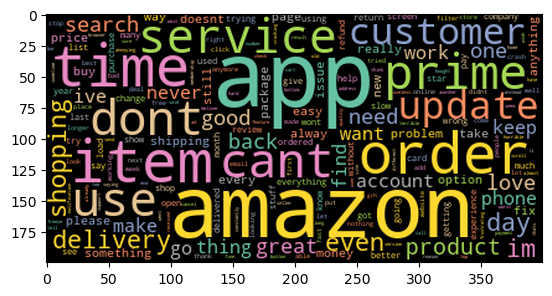

In [6]:
text = " ".join(i for i in df['content'])

from wordcloud import WordCloud
from textblob import TextBlob




wc = WordCloud(colormap='Set2',collocations=False).generate(text)
plt.imshow(wc,interpolation="blackman")
plt.show()

<Axes: xlabel='sentiment'>

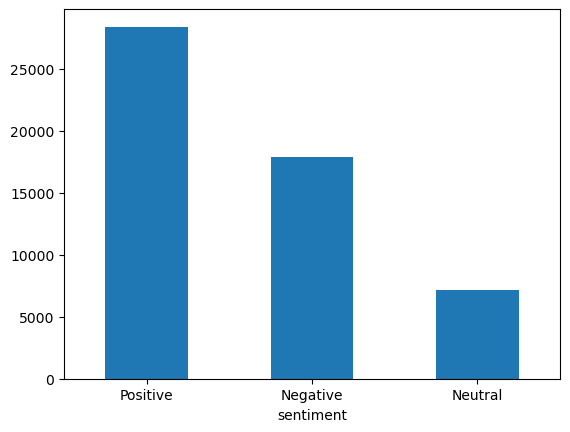

In [7]:
blob = TextBlob(text)

def polarity(text):
    return TextBlob(text).polarity

df['polarity'] = df['content'].apply(polarity)



def sentiment(label):
    if label <0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label >= 0:
        return "Positive"

df['sentiment'] = df['polarity'].apply(sentiment)


df['sentiment'].value_counts().plot(kind='bar',rot=0)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()




X = df['content']
X = cv.fit_transform(X).toarray()
y = df['sentiment']
y = le.fit_transform(y)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
lr = LogisticRegression()
PA = PassiveAggressiveClassifier()



from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

from sklearn.metrics import accuracy_score,classification_report

def evaluate_model(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test, pred)
    print(f'{model.__class__.__name__}, --Accuracy-- {acc*100:.2f}; --Roc-- {clf_rpt}')
    return pred

lr_pred = evaluate_model(X_train, X_test, y_train, y_test, lr)
PA_pred = evaluate_model(X_train, X_test, y_train, y_test, PA)
MNB_pred = evaluate_model(X_train, X_test, y_train, y_test, MNB)
GNB_pred = evaluate_model(X_train, X_test, y_train, y_test, GNB)


LogisticRegression, --Accuracy-- 93.87; --Roc--               precision    recall  f1-score   support

           0       0.94      0.92      0.93      3587
           1       0.88      0.92      0.90      1413
           2       0.95      0.95      0.95      5692

    accuracy                           0.94     10692
   macro avg       0.93      0.93      0.93     10692
weighted avg       0.94      0.94      0.94     10692

PassiveAggressiveClassifier, --Accuracy-- 93.06; --Roc--               precision    recall  f1-score   support

           0       0.91      0.94      0.92      3587
           1       0.91      0.85      0.88      1413
           2       0.95      0.95      0.95      5692

    accuracy                           0.93     10692
   macro avg       0.92      0.91      0.92     10692
weighted avg       0.93      0.93      0.93     10692

MultinomialNB, --Accuracy-- 75.15; --Roc--               precision    recall  f1-score   support

           0       0.67      0.83  

In [9]:
X = df['content']
y = df['sentiment']
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15, random_state=1)


from tensorflow.keras.preprocessing.text import Tokenizer

num_words = 20000
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(len(word_index))


X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


28614


In [10]:
from tensorflow.keras.utils import pad_sequences,to_categorical

max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length

print("Max Length of Sequences: ",max_length)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = pad_sequences(X_train,padding='post')
X_test = pad_sequences(X_test,padding="post")

Max Length of Sequences:  146


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,SpatialDropout1D,Bidirectional,Dropout


RNN = Sequential()
RNN.add(Embedding(len(word_index)+1,output_dim=200,input_length=max_length))
RNN.add(SpatialDropout1D(0.3))
RNN.add(Bidirectional(LSTM(100,dropout=0.1,recurrent_dropout=0.1)))
RNN.add(Dropout(0.2))
RNN.add(Dense(3,activation='relu'))
RNN.add(Dropout(0.1))
RNN.add(Dense(3,activation='sigmoid'))
RNN.summary()


RNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = RNN.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 103s 154ms/step - accuracy: 0.5861 - loss: 0.8127 - val_accuracy: 0.8979 - val_loss: 0.4268
Epoch 2/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 96s 151ms/step - accuracy: 0.8532 - loss: 0.4476 - val_accuracy: 0.9291 - val_loss: 0.2244
Epoch 3/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 98s 154ms/step - accuracy: 0.8899 - loss: 0.2574 - val_accuracy: 0.9439 - val_loss: 0.1897
Epoch 4/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 114s 178ms/step - accuracy: 0.9032 - loss: 0.2036 - val_accuracy: 0.9432 - val_loss: 0.1851
Epoch 5/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 116s 181ms/step - accuracy: 0.9209 - loss: 0.1754 - val_accuracy: 0.9465 - val_loss: 0.1839
Epoch 6/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 116s 182ms/step - accuracy: 0.9299 - loss: 0.1701 - val_accuracy: 0.9423 - val_loss: 0.1907
Epoch 7/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 117s 183ms/step - accuracy: 0.9331 - loss: 0.1578 - val_accuracy: 0.9454 - val_loss: 0.1954
Epoch 8/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 122s 191ms/step - accuracy: 0.9357 - l

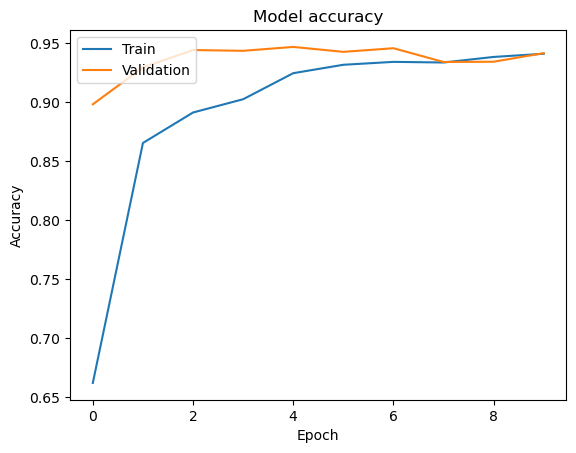

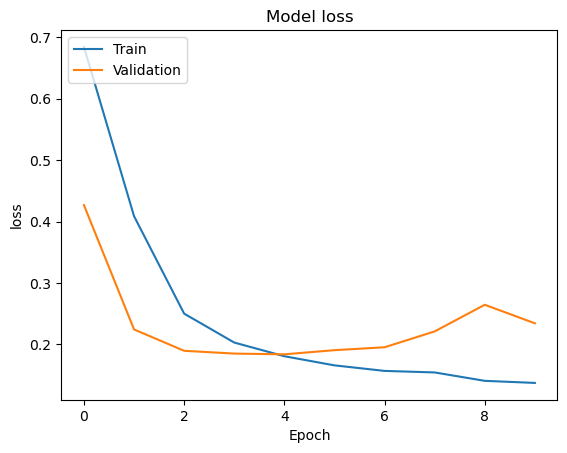

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [13]:
#Nice